# Аналитика по встречам книжного клуба

## подготовка

In [1]:
# %pip install openpyxl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats

## считываем

In [3]:
meetings = pd.read_excel('Встречи книжного чатика.xlsx', sheet_name='meetings')
meetings_det = pd.read_excel('Встречи книжного чатика.xlsx', sheet_name='встречи')
books = pd.read_excel('Встречи книжного чатика.xlsx', sheet_name='books')
participants = pd.read_excel('Встречи книжного чатика.xlsx', sheet_name='participants')
participants2021 = pd.read_excel('Встречи книжного чатика.xlsx', sheet_name='2021 участники',  skiprows=2)

## рисуем
### Мальчики и девочки

In [4]:
sexes = participants2021[participants2021.columns[-2:]][:2].copy()
sexes = sexes.rename(columns={"Row Labels.1": "Пол", "Count of пол": "Число"})
sexes

,Пол,Число
0,female,40.0
1,male,15.0


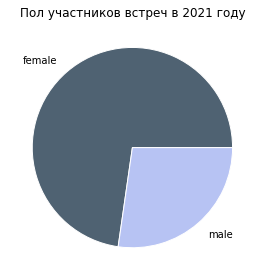

In [5]:
# Create a set of colors
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']

# Use it thanks to the color argument
plt.pie(sexes.Число, labels=sexes.Пол, labeldistance=1.15, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors);
plt.title('Пол участников встреч в 2021 году')
plt.tight_layout()
plt.savefig('plot/2021/sex.png', dpi=300, bbox_inches='tight')   # save the figure to file

### Доля офлайн встреч?

In [6]:
meetings_plot = meetings[['dt', 'format', 'Офлайн', 'Онлайн', 'Гибридные']].copy()

In [7]:
meetings_plot = meetings_plot[meetings_plot.dt > '2020-01-01']
meetings_plot.reset_index(inplace=True)

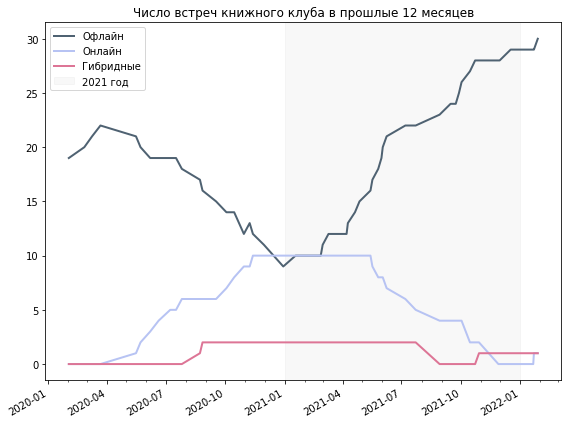

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

half_year_locator = mdates.MonthLocator(interval=3)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

# Rotates and right aligns the x labels. 
# Also moves the bottom of the axes up to make room for them.
fig.autofmt_xdate()
ax.plot( 'dt', 'Офлайн', data=meetings_plot, marker='', color=colors[0], linewidth=2)
ax.plot( 'dt', 'Онлайн', data=meetings_plot, marker='', color=colors[1], linewidth=2)
ax.plot( 'dt', 'Гибридные', data=meetings_plot, marker='', color=colors[2], linewidth=2)
ax.axvspan(pd.to_datetime('2021-01-01'), pd.to_datetime('2022-01-01'), alpha=0.05, color='grey', label = '2021 год')


# show legend
plt.legend()

# show graph
plt.title('Число встреч книжного клуба в прошлые 12 месяцев')
plt.tight_layout()
plt.savefig('plot/2021/meeting.png', dpi=300, bbox_inches='tight')   # save the figure to file


### Размер встреч

In [9]:
meetings_det['Год'] = meetings_det.Дата.dt.year

In [10]:
meetings_det

,Дата,Книга,жанр/тема,количество участников,формат (онлайн/офлайн/микс),Год
0,2019-03-30,"""Петровы в гриппе и вокруг него"" Сальников",NaN,NaN,офлайн,2019
1,2019-05-18,"""Холодный дом"" Диккенз",NaN,4.0,офлайн,2019
2,2019-06-08,"""Секс. От нейробиологии либидо до виртуального...",нон-фикшн,NaN,офлайн,2019
3,2019-07-13,"""Проблема трех тех"" Цысинь (первый том)",NaN,4.0,офлайн,2019
4,2019-07-20,"""Человек, который принял жену за шляпу"" Сакс",нон-фикшн,NaN,офлайн,2019
...,...,...,...,...,...,...
66,2021-11-30,"""Красота это горе"" Курниаван",NaN,6.0,офлайн,2021
67,2021-12-17,Обмен новогодними подарками для Secret Librarian,NaN,9.0,офлайн,2021
68,2022-01-10,"""Правда о деле Гарри Квеберта"" Диккер",NaN,11.0,офлайн,2022
69,2022-01-21,"""Семь смертей Эвелины Хардкасл"" Тёртон",NaN,16.0,офлайн,2022


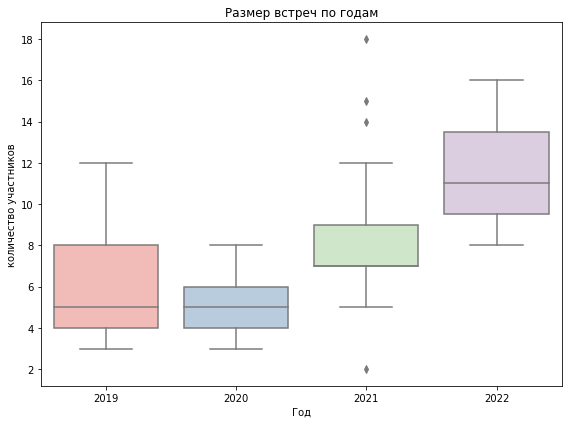

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x=meetings_det["Год"], y=meetings_det["количество участников"], palette="Pastel1")

# show graph
plt.title('Размер встреч по годам')
plt.tight_layout()
plt.savefig('plot/2021/meeting_size.png', dpi=300, bbox_inches='tight')   # save the figure to file


In [12]:
meetings_det[meetings_det.Год == 2019]["количество участников"].dropna()

1      4.0
3      4.0
9      4.0
10     3.0
12    12.0
14    12.0
15     5.0
16     8.0
17     5.0
Name: количество участников, dtype: float64

In [13]:
meetings_det.groupby('Год')["количество участников"].mean()

Год
2019     6.333333
2020     5.333333
2021     8.275862
2022    11.666667
Name: количество участников, dtype: float64

In [14]:
rng = np.random.default_rng()

In [15]:
stats.ttest_ind(meetings_det[meetings_det.Год == 2019]["количество участников"].dropna(), meetings_det[meetings_det.Год == 2020]["количество участников"], permutations=10000,
                random_state=rng)

Ttest_indResult(statistic=1.1042440123041997, pvalue=0.3073)

In [16]:
stats.ttest_ind(meetings_det[meetings_det.Год == 2020]["количество участников"], meetings_det[meetings_det.Год == 2021]["количество участников"], permutations=10000,
                random_state=rng)

Ttest_indResult(statistic=-3.811436183960619, pvalue=0.0001)

In [17]:
stats.ttest_ind(meetings_det[meetings_det.Год == 2021]["количество участников"], meetings_det[meetings_det.Год == 2022]["количество участников"], permutations=10000,
                random_state=rng)

Ttest_indResult(statistic=-1.6744650391178626, pvalue=0.10262096774193548)